In [21]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
%matplotlib inline

In [2]:
r_23= pd.ExcelFile("data_downloads_website/2022-2023_england_ks5underlying.xlsx")

In [3]:
r_23.sheet_names

['Contents',
 'Metadata',
 'Institution_subject_results',
 'Institution_aggregated_results',
 'National_data',
 'Institution_subject_entries']

In [4]:
subj_23 = pd.read_excel(r_23, "Institution_subject_results")  

In [5]:
subj_23.columns

Index(['Year', 'Local Authority', 'URN', 'School or college name',
       'School or college type', 'Exam cohort', 'Qualification', 'Level',
       'ASIZE', 'GSIZE', 'Grade structure', 'Subject', 'Grade/Total entries',
       'Number of exams'],
      dtype='object')

In [6]:
subj_23.shape

(582314, 14)

In [7]:
schools_urn = [136298,138313,137353,100750,132942, 136309, 135073, 140939, 101162]

In [1]:
m = subj_23.loc[subj_23['URN']==137353].copy()

NameError: name 'subj_23' is not defined

In [9]:
m.shape

(176, 14)

Year
2023    176
Name: count, dtype: int64
Local Authority
Westminster    176
Name: count, dtype: int64
URN
137353    176
Name: count, dtype: int64
School or college name
The St Marylebone CofE School    176
Name: count, dtype: int64
School or college type
Converter Academy    176
Name: count, dtype: int64
Exam cohort
A level           168
Other academic      8
Name: count, dtype: int64
Qualification
GCE A level                   162
Extended Project (Diploma)      8
GCE AS level                    6
Name: count, dtype: int64
Level
3    176
Name: count, dtype: int64
ASIZE
1.0    162
0.3      8
0.5      6
Name: count, dtype: int64
GSIZE
4.0    162
1.2      8
2.0      6
Name: count, dtype: int64
Grade structure
*,A,B,C,D,E    170
A,B,C,D,E        6
Subject

In [10]:
m[['Qualification', 'Level',
       'ASIZE', 'GSIZE', 'Grade structure', 'Subject', 'Grade/Total entries',
       'Number of exams']].head()

,Qualification,Level,ASIZE,GSIZE,Grade structure,Subject,Grade/Total entries,Number of exams
386133,GCE A level,3,1.0,4.0,"*,A,B,C,D,E",Art and Design (Fine Art),*,12
386134,GCE A level,3,1.0,4.0,"*,A,B,C,D,E",Art and Design (Fine Art),A,19
386135,GCE A level,3,1.0,4.0,"*,A,B,C,D,E",Art and Design (Fine Art),B,2
386136,GCE A level,3,1.0,4.0,"*,A,B,C,D,E",Art and Design (Fine Art),C,0
386137,GCE A level,3,1.0,4.0,"*,A,B,C,D,E",Art and Design (Fine Art),D,0


In [11]:
m.loc[m['Qualification']=='GCE A level'].pivot(index='Subject', columns='Grade/Total entries', values='Number of exams')

Grade/Total entries,*,A,B,C,D,E,Fail,Total
Subject,,,,,,,,
Art and Design (Fine Art),12,19,2,0,0,0,NaN,33
Biology,4,7,6,5,5,1,NaN,28
Chemistry,1,7,5,8,6,1,NaN,28
Classical Civilisation,1,1,4,5,0,0,NaN,11
Dance,3,2,1,0,0,0,NaN,6
Drama and Theatre Studies,5,9,8,0,0,0,NaN,22
Economics,1,8,13,11,4,0,NaN,37
English Literature,13,13,13,1,1,0,NaN,41
French,3,2,3,4,0,1,NaN,13


In [3]:
s = pd.read_csv('/home/ec2-user/projects/schools/notebooks/data/a-level-subj-smaller_list.csv')

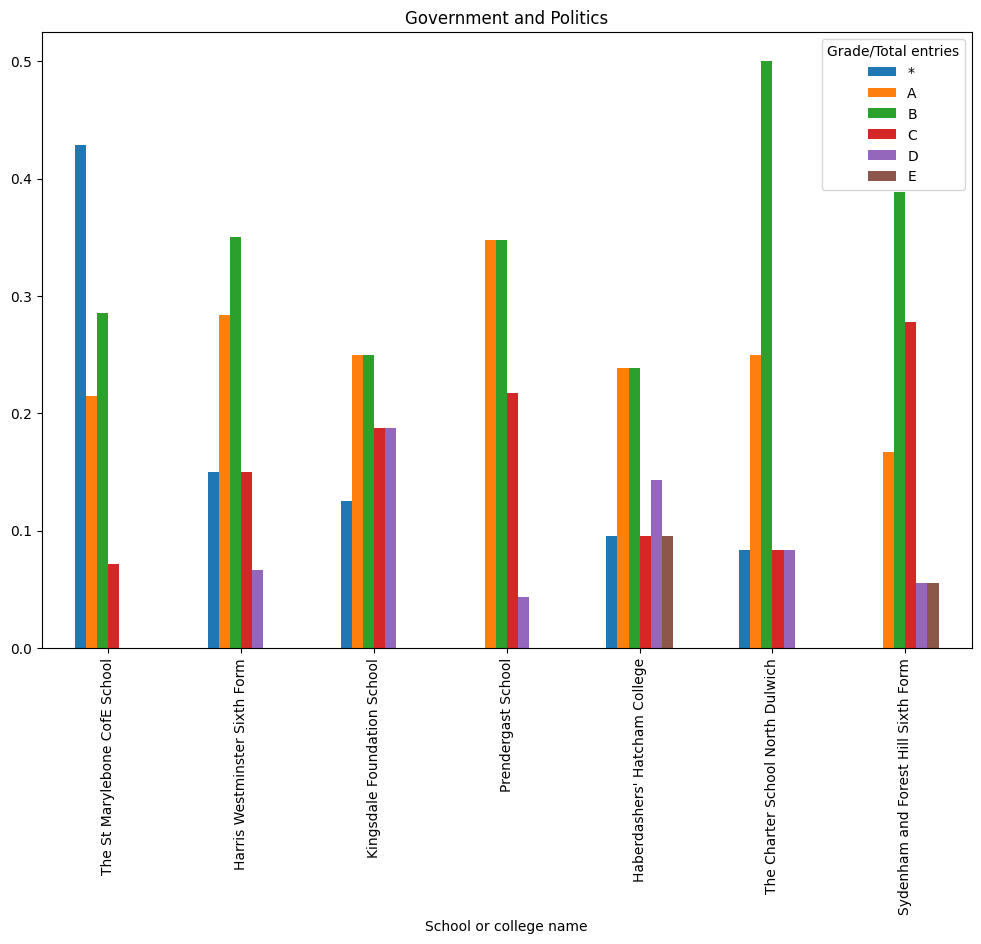

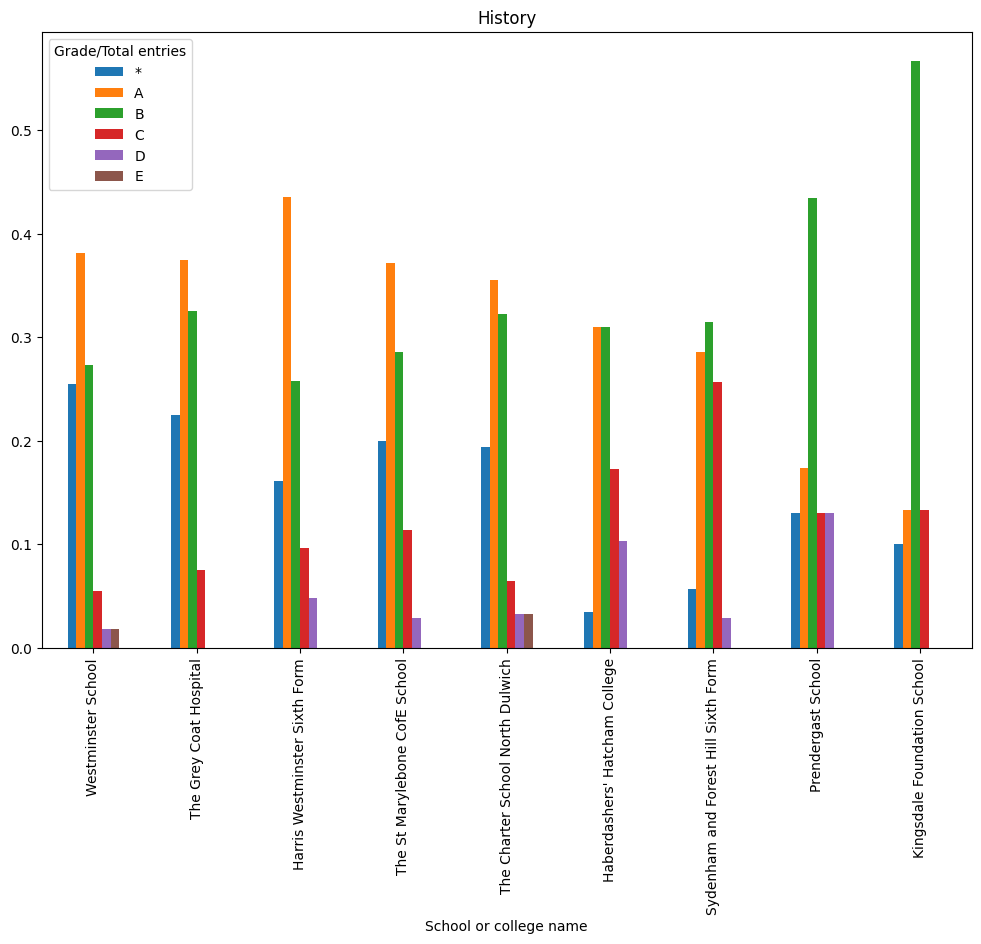

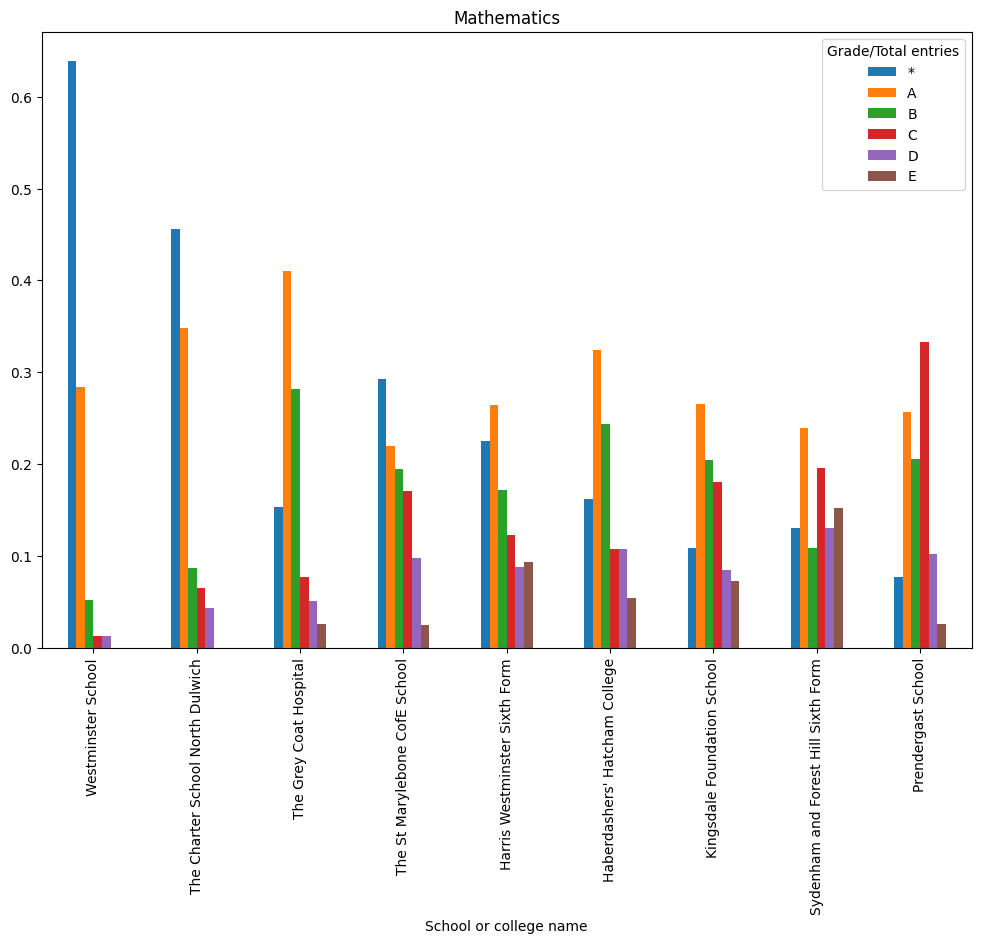

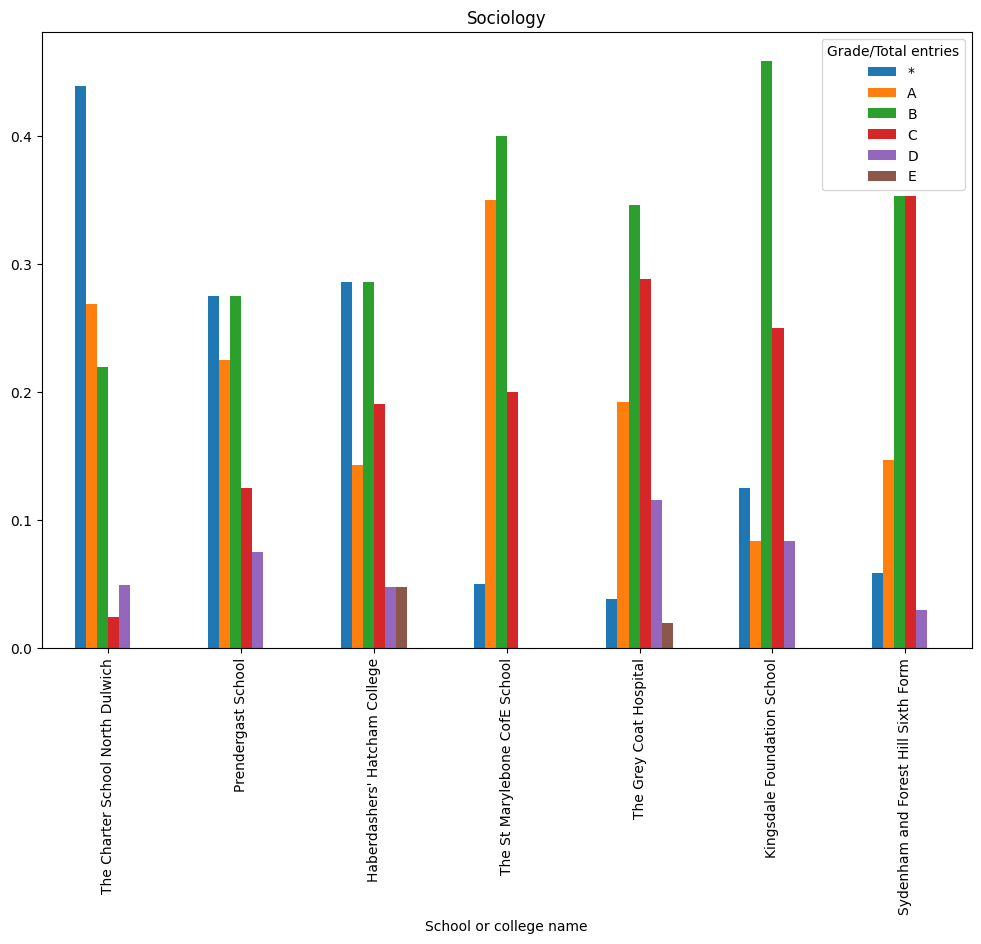

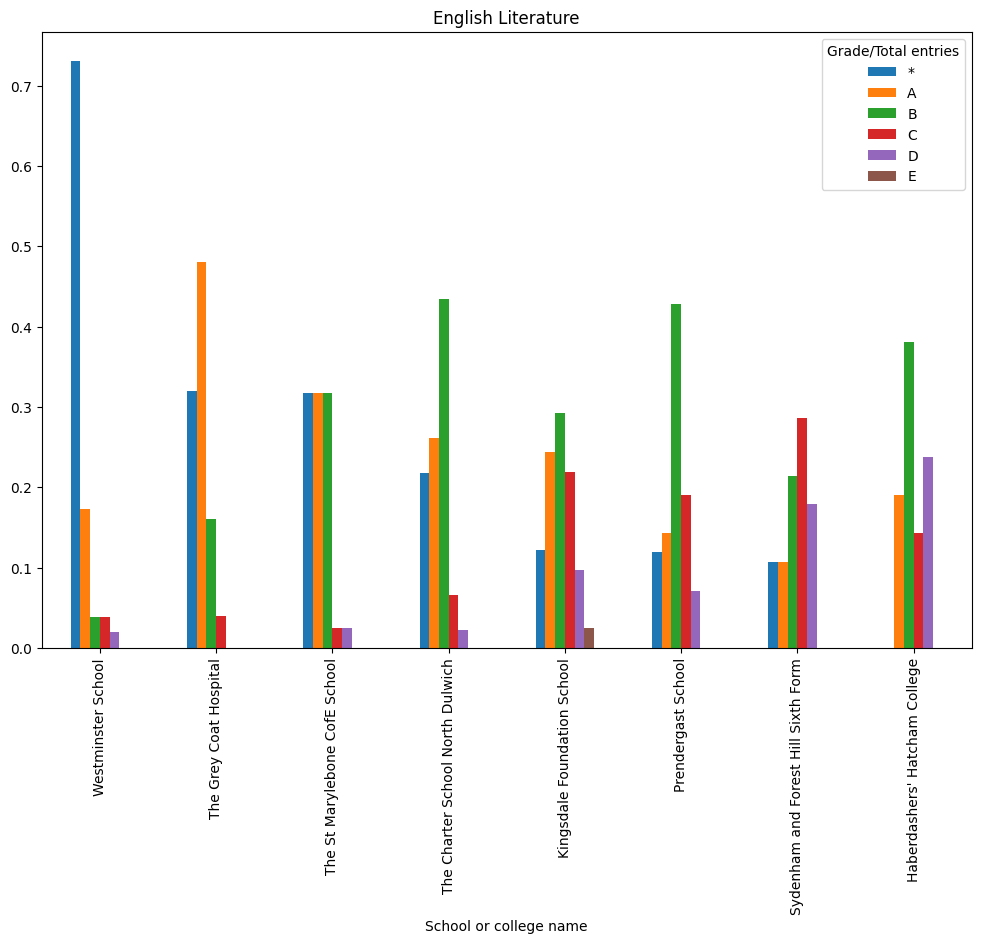

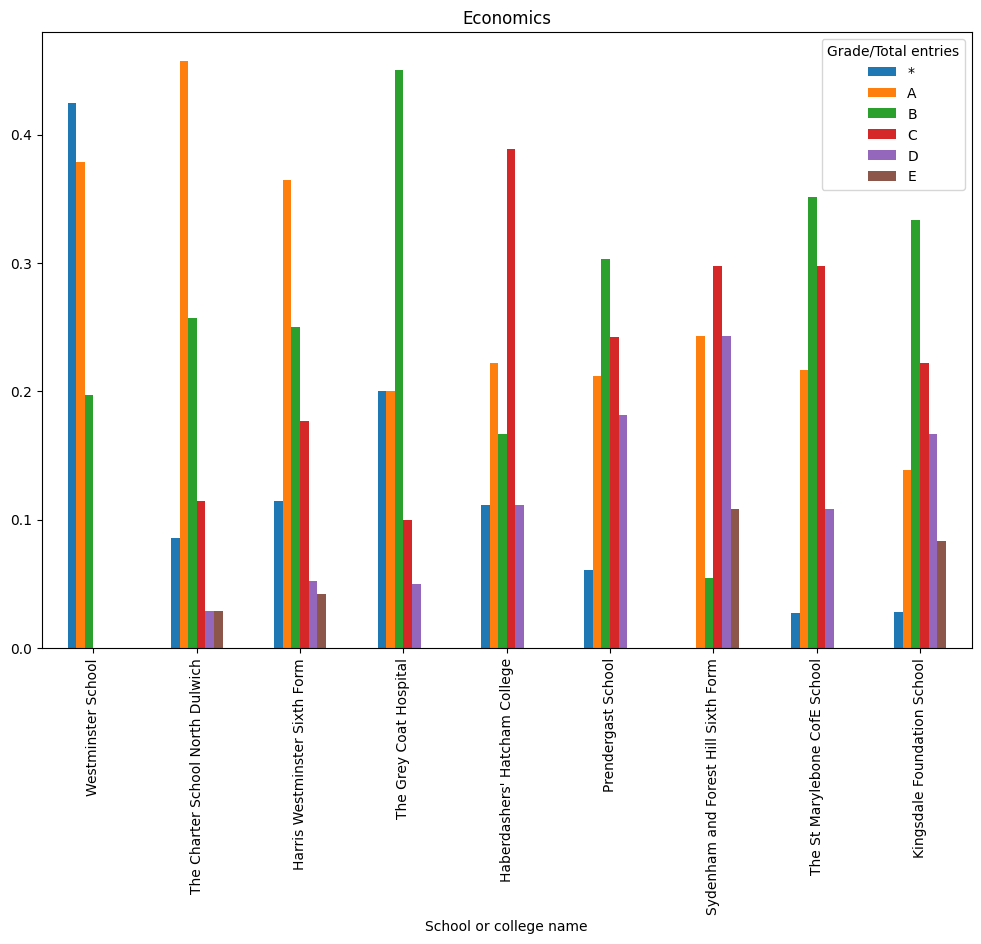

In [4]:
courses = ['Government and Politics','History','Mathematics','Sociology','English Literature','Economics']
# s = subj_23.loc[subj_23['URN'].isin(schools_urn) ].copy()
a_levels = s.loc[s['Qualification']=='GCE A level']

for subj in courses:
    course = a_levels.loc[(s['Subject']==subj)].pivot(
        index='School or college name', 
        columns='Grade/Total entries', 
        values='Number of exams'
        ).reset_index()
    c = course[['*', 'A', 'B', 'C', 'D', 'E', 'Total']].fillna(0).astype(float)
    c = c.div(c['Total'], axis=0)
    c['School or college name']=course['School or college name']
    c['A*A'] = sum([c['*'], c['A']])
    c.sort_values(by='A*A', axis=0, ascending=False)[['School or college name','*', 'A', 'B', 'C', 'D', 'E',]].plot(
        kind='bar', x='School or college name', figsize=(12,8), title=subj)

In [13]:
c['School or college name']

0          Haberdashers' Hatcham College
1          Harris Westminster Sixth Form
2            Kingsdale Foundation School
3                     Prendergast School
4    Sydenham and Forest Hill Sixth Form
5       The Charter School North Dulwich
6                 The Grey Coat Hospital
7          The St Marylebone CofE School
8                     Westminster School
Name: School or college name, dtype: object

/tmp/ipykernel_2962/3780419534.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  best = pd.concat([best, pd.DataFrame(


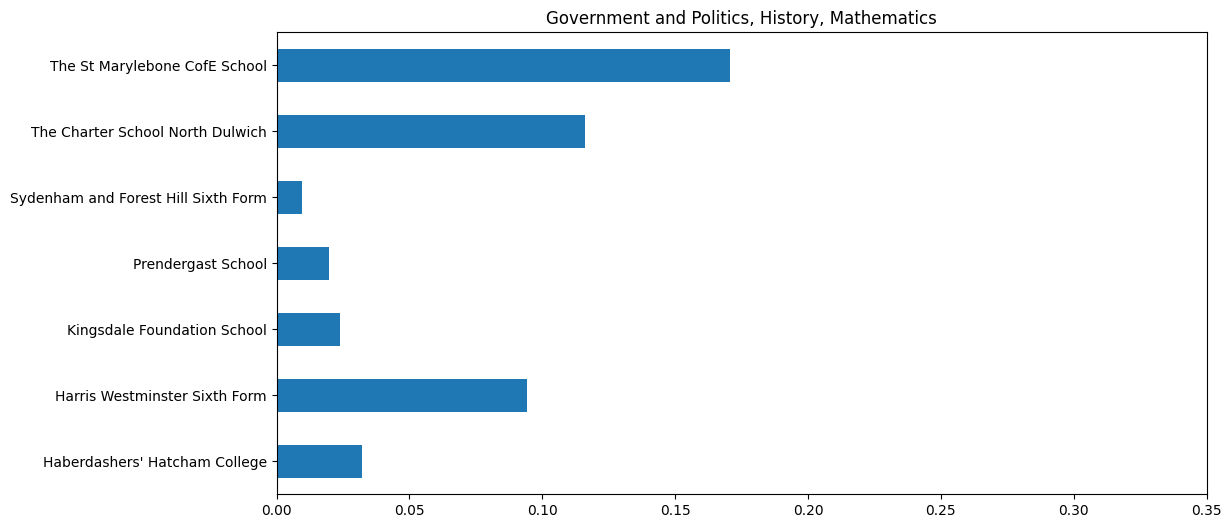

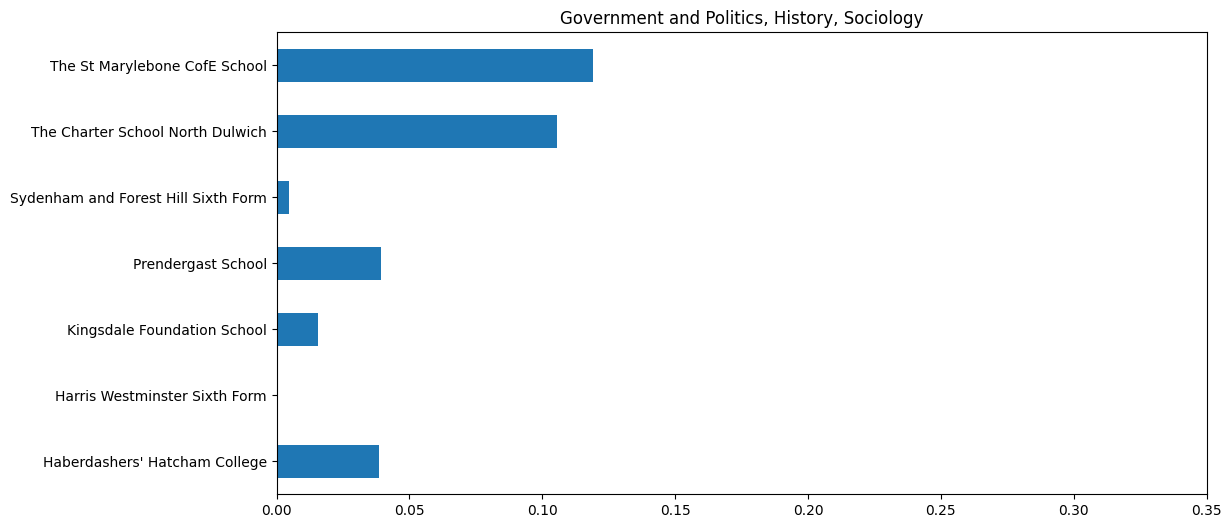

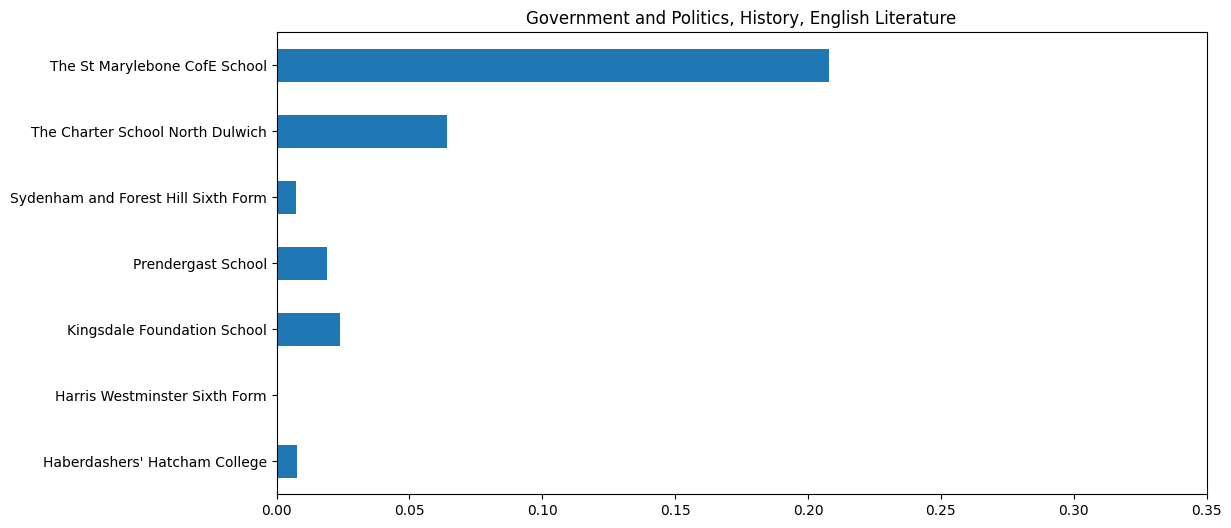

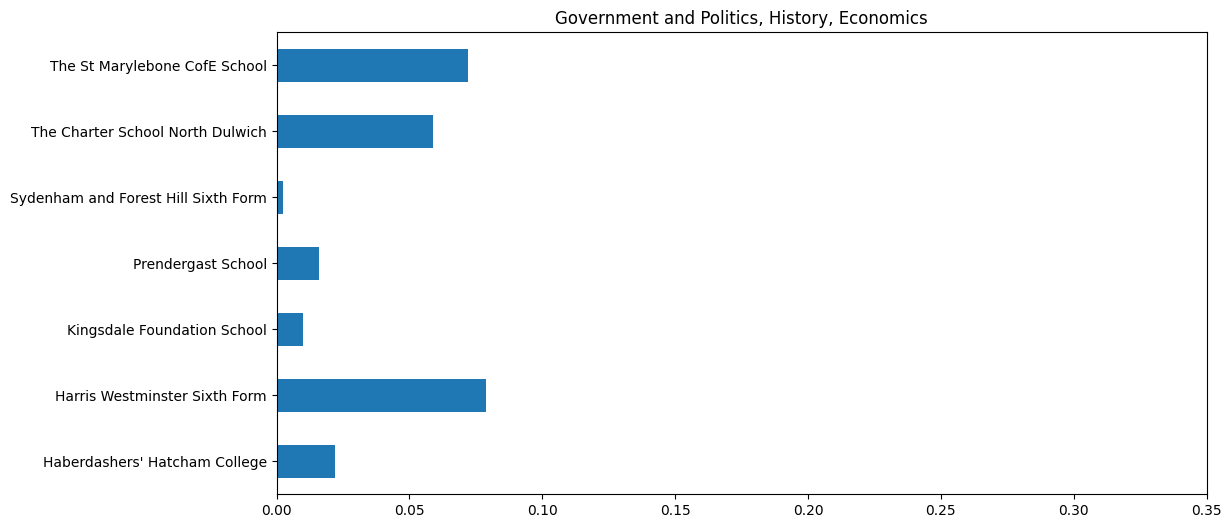

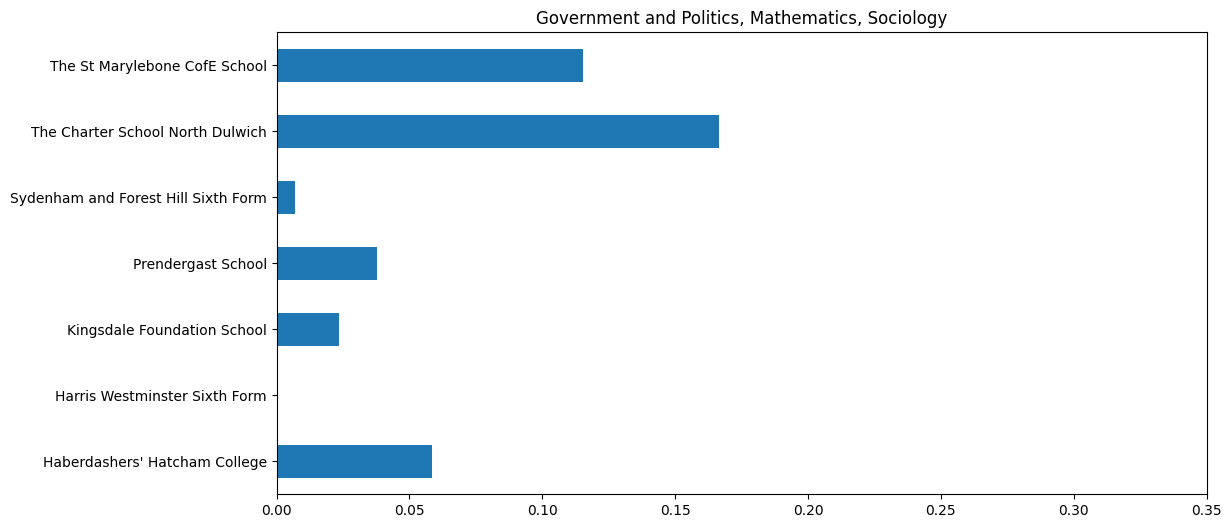

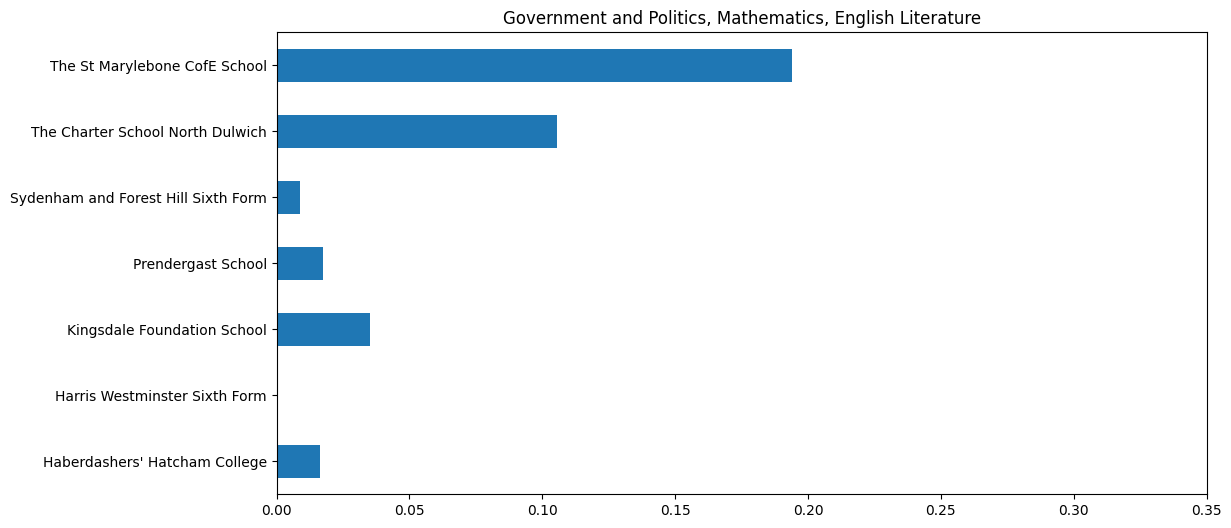

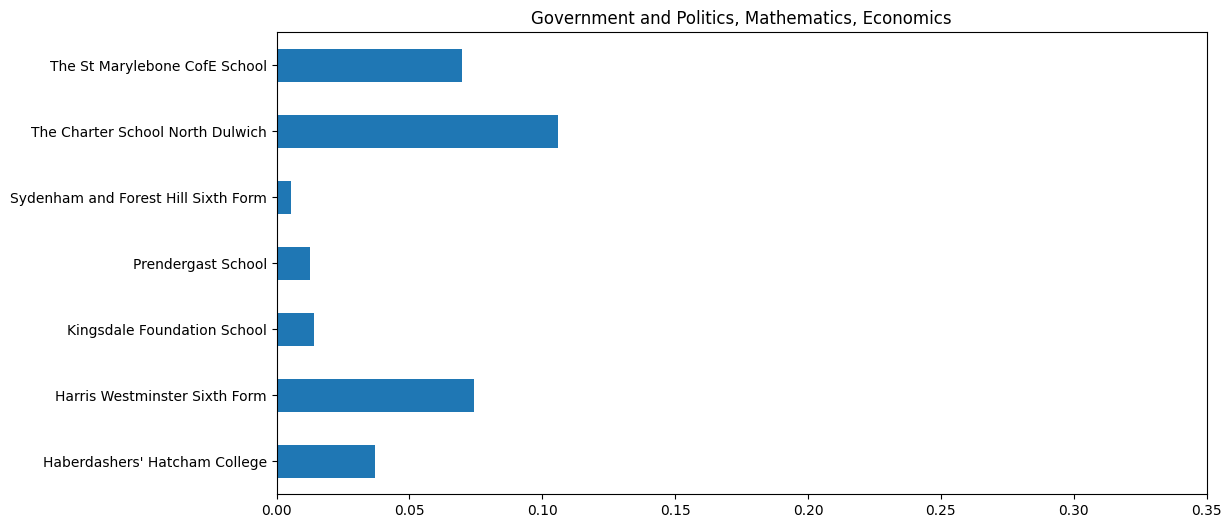

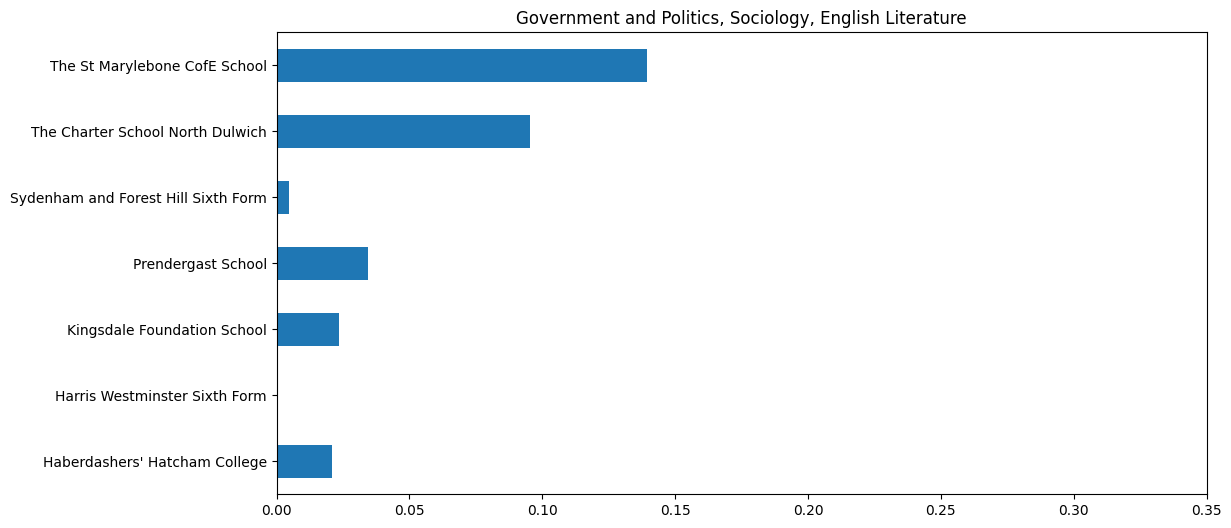

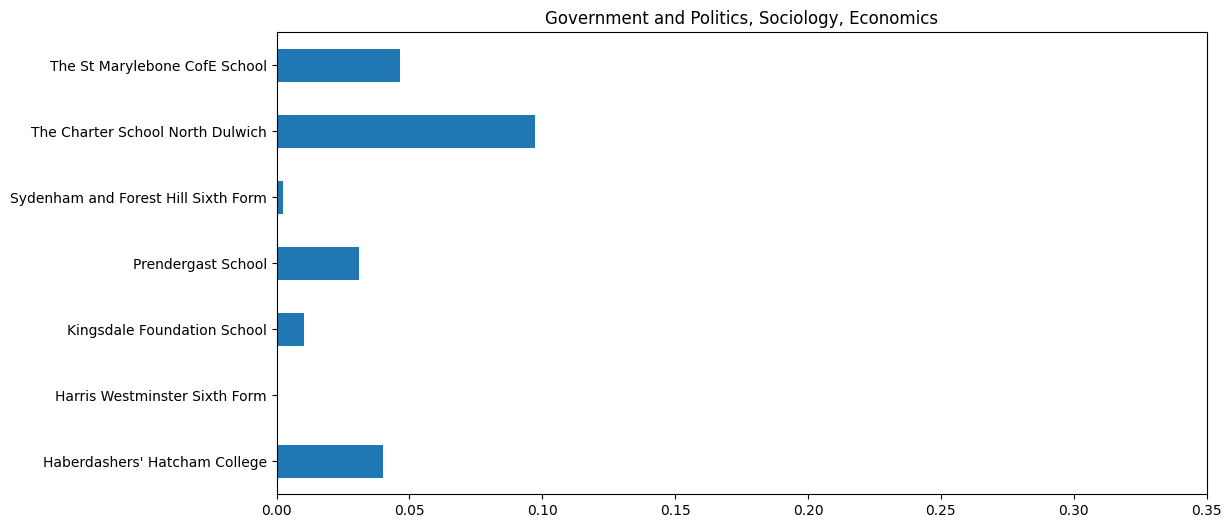

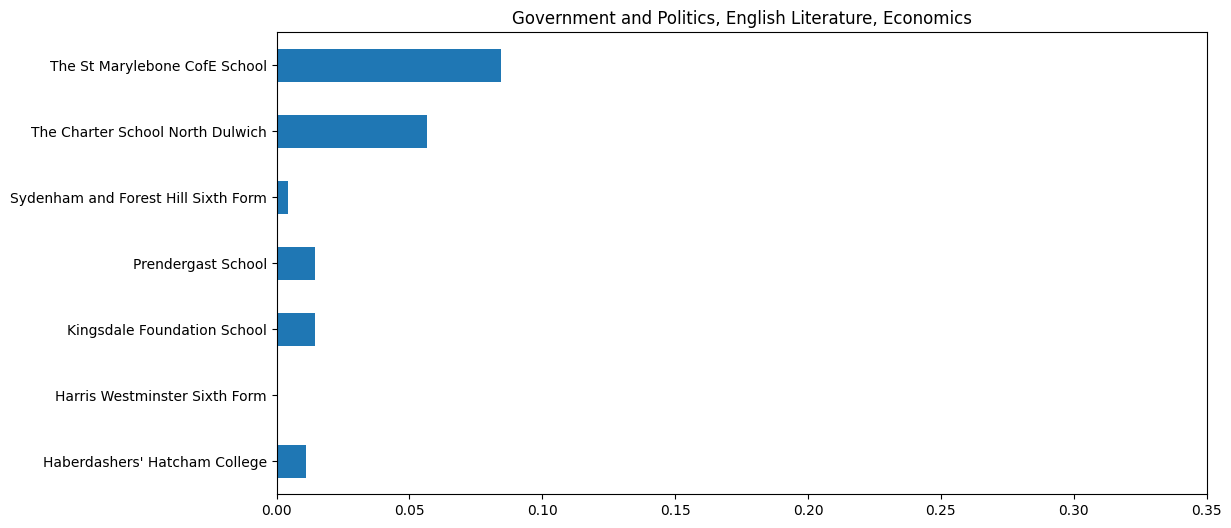

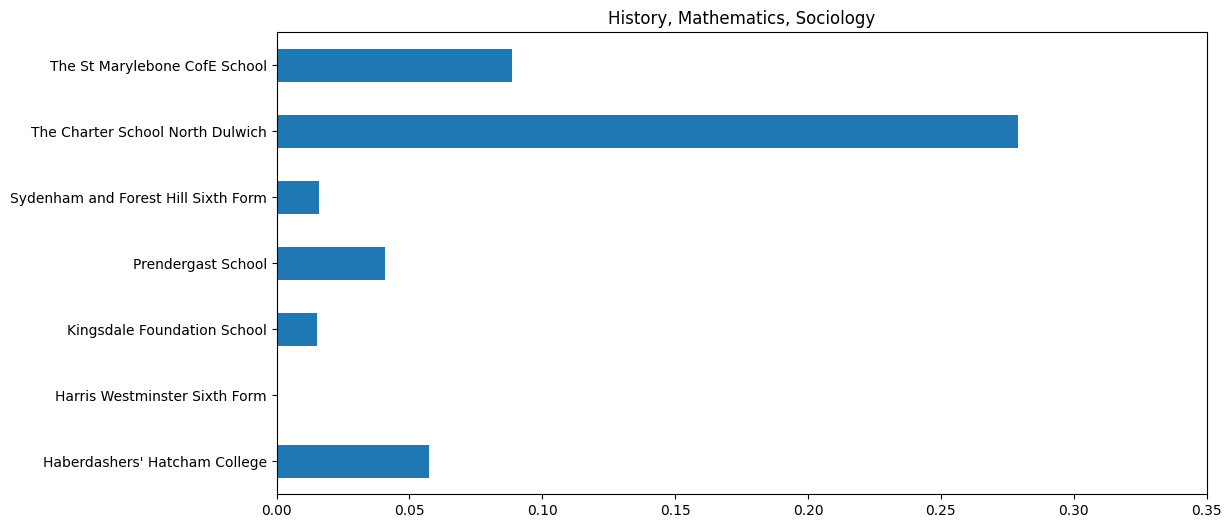

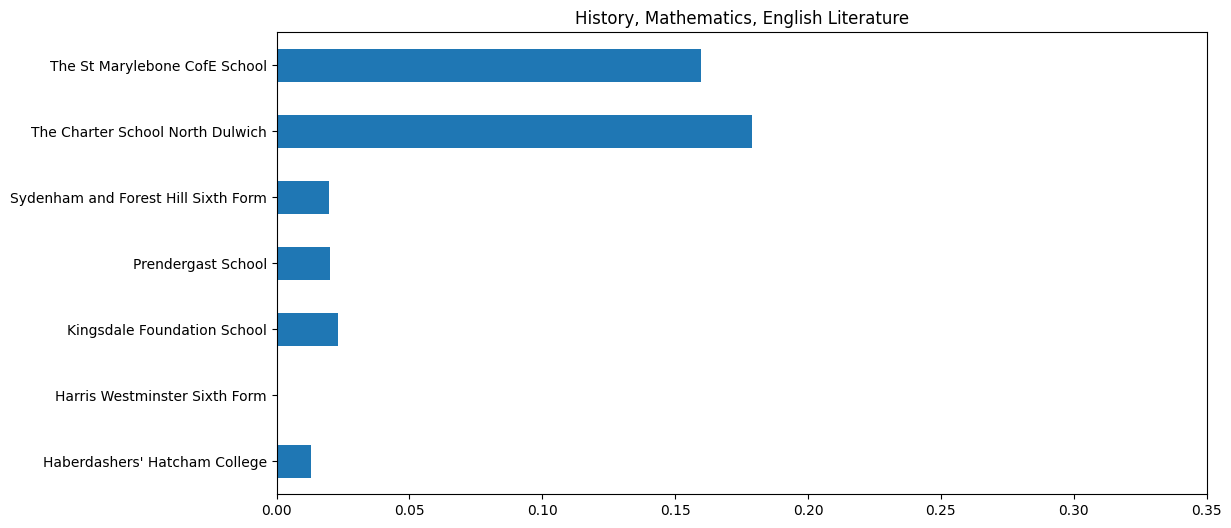

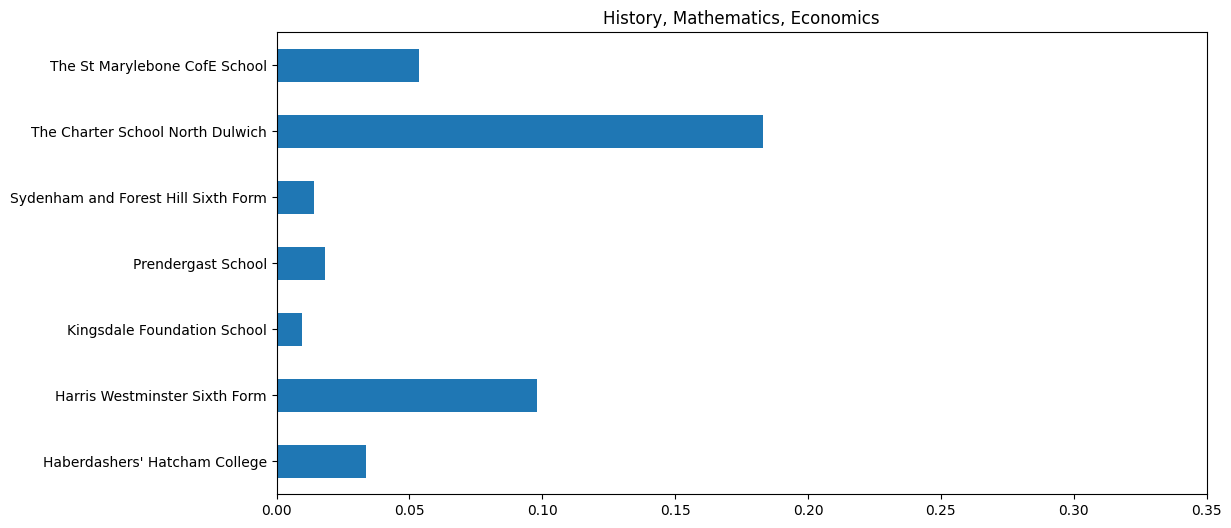

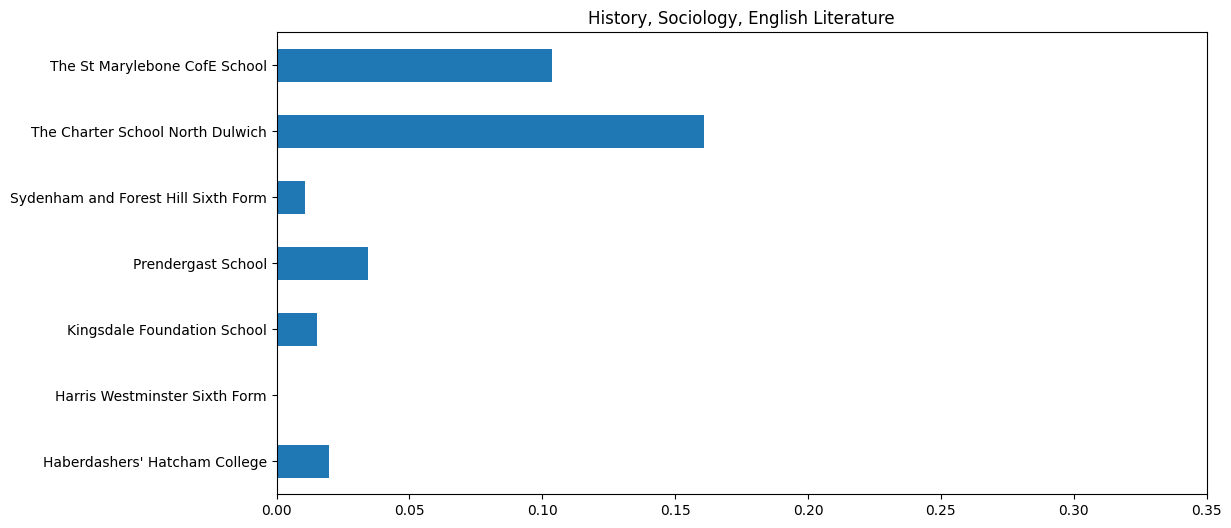

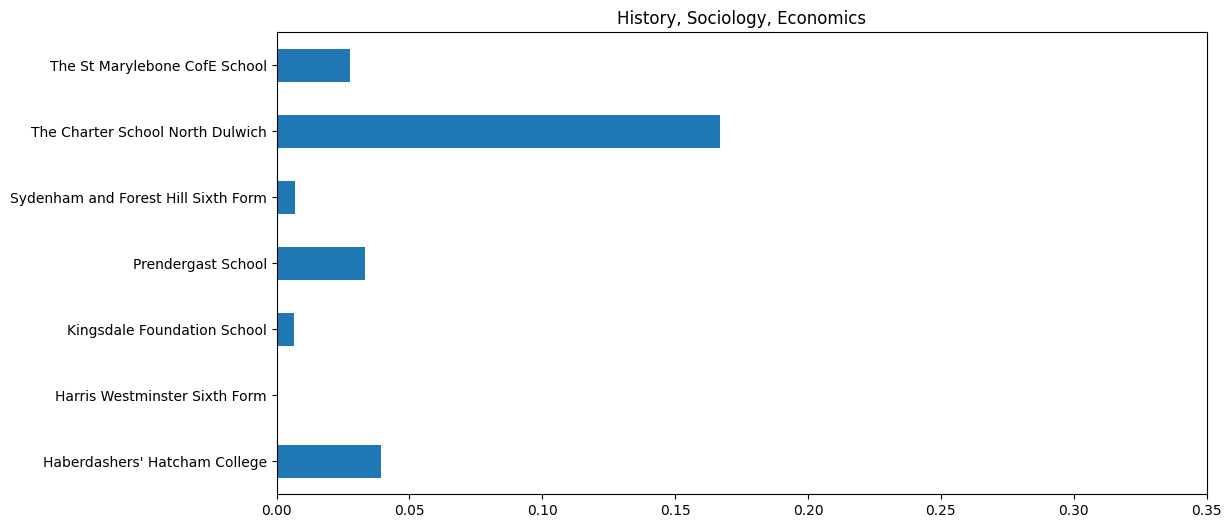

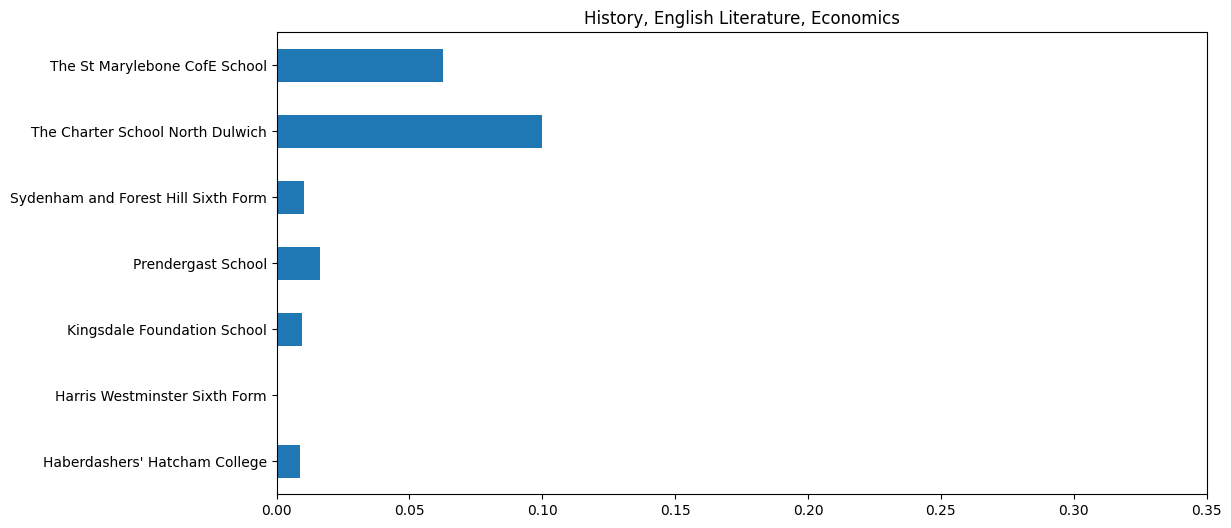

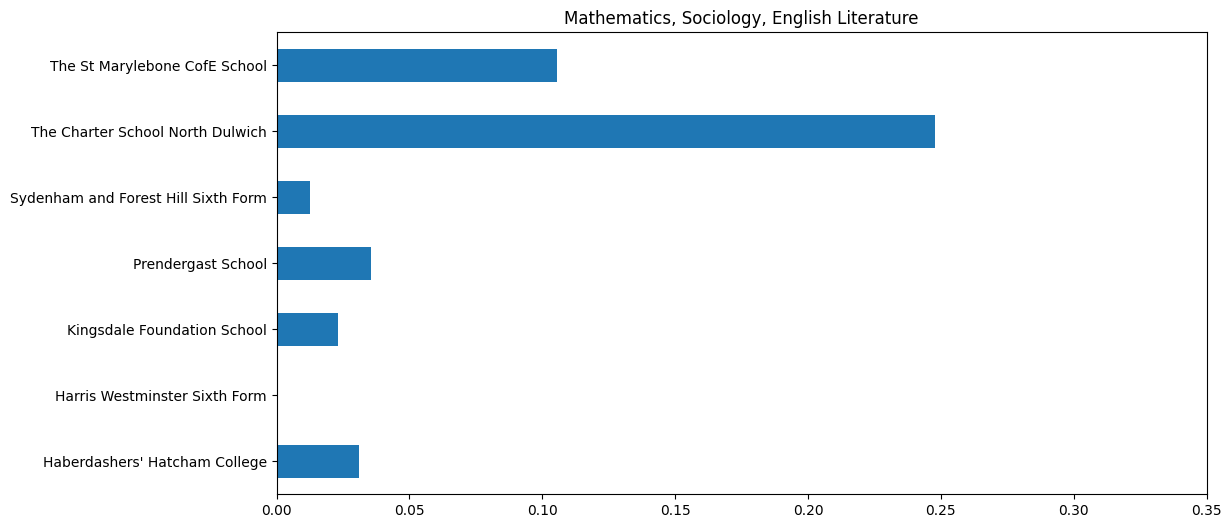

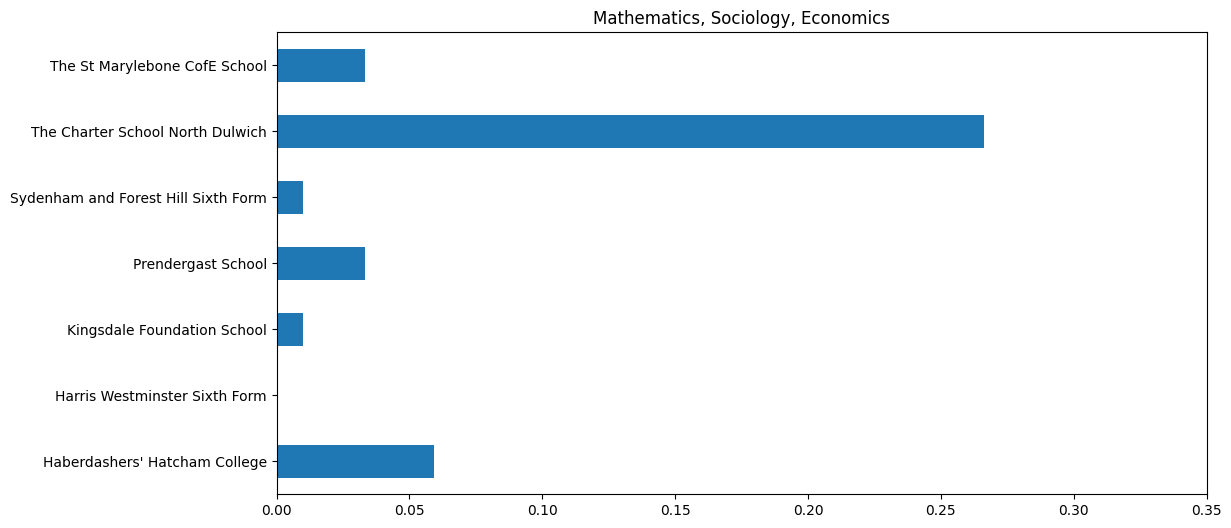

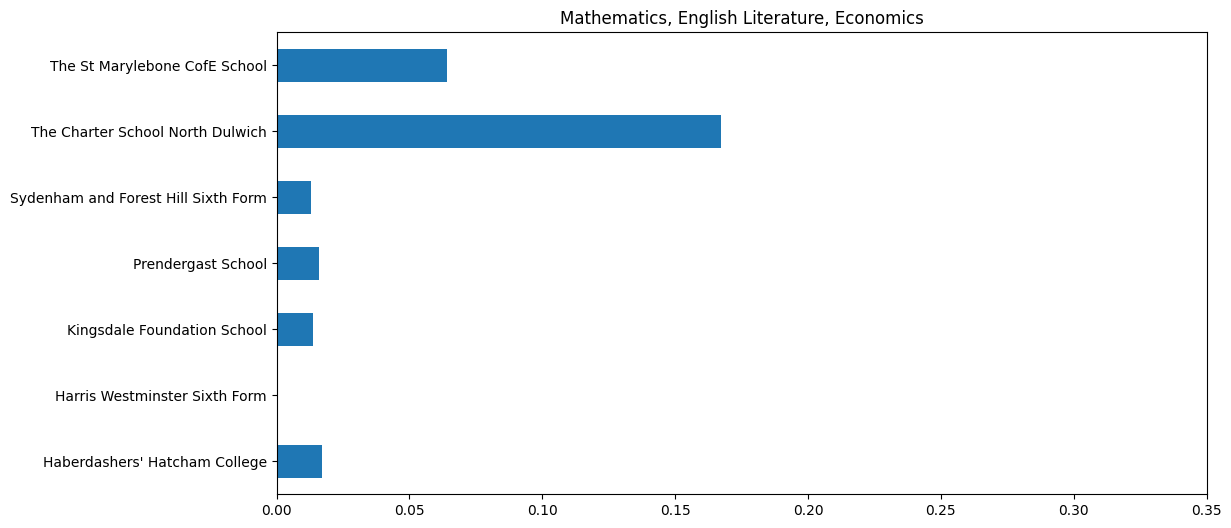

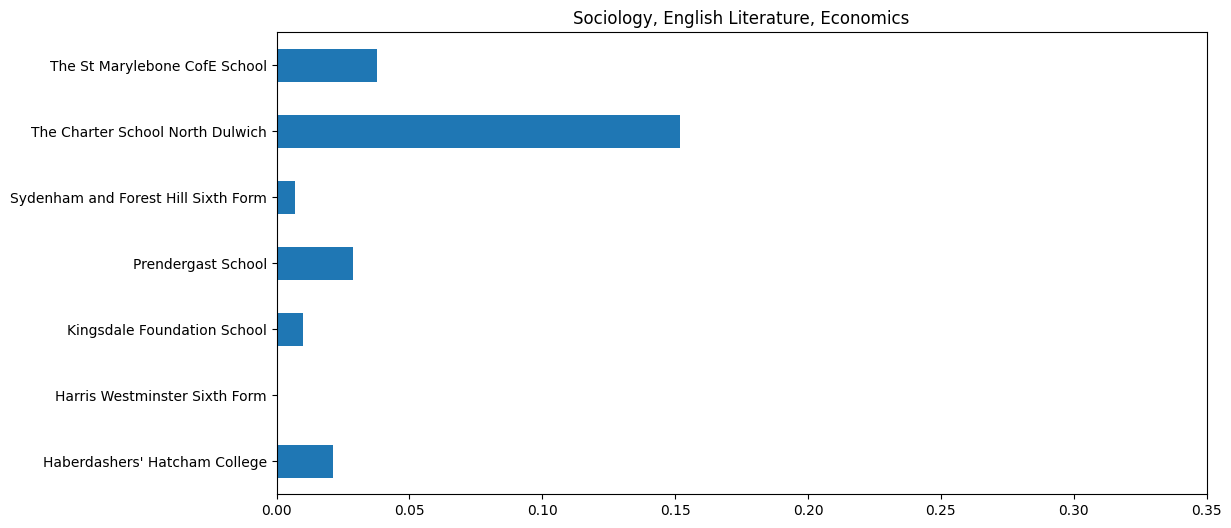

,Subject Combination,Probability,Best School,odds against
0,"Government and Politics, History, Mathematics",0.17,The St Marylebone CofE School,4.9
1,"Government and Politics, History, Sociology",0.12,The St Marylebone CofE School,7.3
2,"Government and Politics, History, English Lite...",0.21,The St Marylebone CofE School,3.8
3,"Government and Politics, History, Economics",0.08,Harris Westminster Sixth Form,11.5
4,"Government and Politics, Mathematics, Sociology",0.17,The Charter School North Dulwich,4.9
5,"Government and Politics, Mathematics, English ...",0.19,The St Marylebone CofE School,4.3
6,"Government and Politics, Mathematics, Economics",0.11,The Charter School North Dulwich,8.1
7,"Government and Politics, Sociology, English Li...",0.14,The St Marylebone CofE School,6.1
8,"Government and Politics, Sociology, Economics",0.10,The Charter School North Dulwich,9.0
9,"Government and Politics, English Literature, E...",0.08,The St Marylebone CofE School,11.5


In [18]:
def grade_subj(subj, a_level_results):
    course = a_level_results.loc[(a_level_results['Subject']==subj)].pivot(
    index='School or college name', 
    columns='Grade/Total entries', 
    values='Number of exams'
    ).reset_index()
    c = course[['*', 'A', 'B', 'C', 'D', 'E', 'Total']].fillna(0).astype(float)
    c = c.div(c['Total'], axis=0)
    c['School or college name']=course['School or college name']
    c['A*A'] = sum([c['*'], c['A']])
    return c[['School or college name','A*A', 'A']].set_index('School or college name')

best = pd.DataFrame(columns = ['Best School','Probability','Subject Combination'], index=[])
odds = pd.DataFrame(index=["Haberdashers' Hatcham College", 'Harris Westminster Sixth Form',
        'Kingsdale Foundation School', 'Prendergast School',
        'Sydenham and Forest Hill Sixth Form',
        'The Charter School North Dulwich', 'The St Marylebone CofE School'])

for choice in itertools.combinations(courses, 3):
    df = pd.DataFrame({'A*A':[1.]*7, 'A':[1.]*7},index=["Haberdashers' Hatcham College", 'Harris Westminster Sixth Form',
        'Kingsdale Foundation School', 'Prendergast School',
        'Sydenham and Forest Hill Sixth Form',
        'The Charter School North Dulwich', 'The St Marylebone CofE School'])
    for subj in choice:
        subject_dist =  grade_subj(subj, a_levels)
        df['A*A'] = df['A*A']*subject_dist['A*A']
        df['A'] = df['A']*subject_dist['A']
    choice_str = ", ".join(choice)
    prob= df['A*A']-df['A']
    odds[choice_str] = ((1-prob)/prob).round(1)
    best = pd.concat([best, pd.DataFrame(
        {'Subject Combination':choice_str,
         'Probability':prob.max().round(2),
         'Best School':prob.idxmax(), 
          
         }, index=[0])], ignore_index=True)
    
    

    ax = prob.plot(kind='barh', figsize=(12,6), title=choice_str)
    ax.set_xlim(0,0.35)
    plt.show()
best['odds against'] = ((1-best['Probability'])/best['Probability']).round(1)
best[['Subject Combination',
         'Probability',
         'Best School', 'odds against']]

    


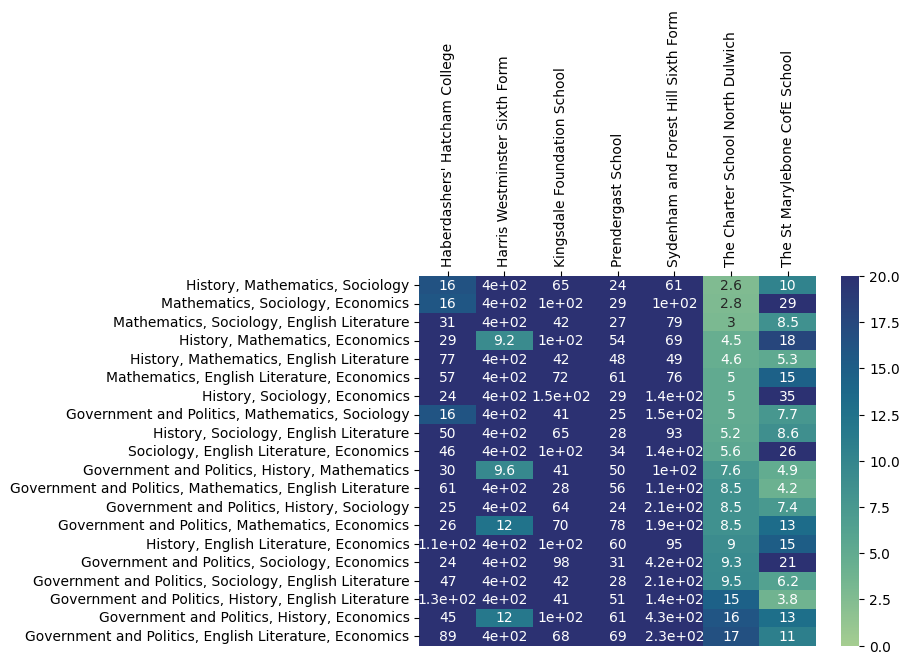

In [29]:
ax = sns.heatmap(odds.T.fillna(400).sort_values(by='The Charter School North Dulwich'), cmap="crest", annot=True, vmin=0, vmax=20)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
ax.tick_params(axis='x', labelrotation=90)

In [50]:
len([x for x in itertools.combinations(courses, 3)])

20

<Axes: ylabel='School or college name'>

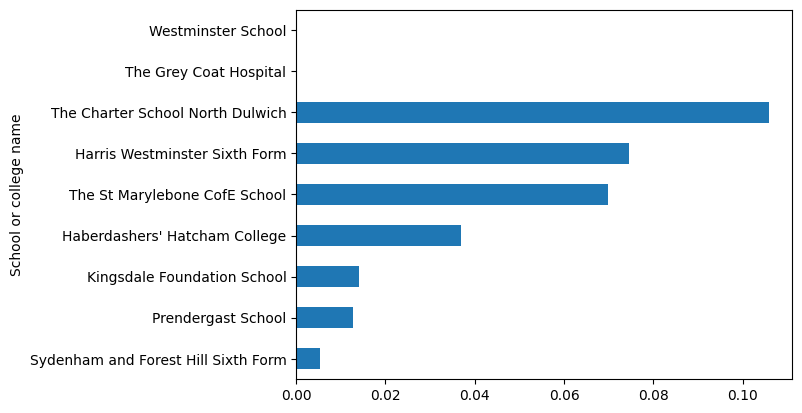

In [23]:
(a_level_2['A*A']*a_level_1['A*A']*a_level_3['A*A'] - a_level_2['A'] * a_level_1['A']* a_level_3['A']).sort_values().plot(kind='barh')

In [19]:
a_levels.loc[a_levels['School or college name']=='The Grey Coat Hospital']['Subject'].value_counts()

Subject
Chemistry                                      8
Mathematics (Further)                          8
Biology                                        7
Art and Design (Fine Art)                      7
Design and Technology (Textiles Technology)    7
Economics                                      7
English Language and Literature                7
Design and Technology (Product Design)         7
English Literature                             7
Film Studies                                   7
Geography                                      7
French                                         7
History                                        7
History of Art                                 7
Italian                                        7
German                                         7
Mathematics                                    7
Music                                          7
Physics                                        7
Psychology                                     7
Religious St